<a href="https://colab.research.google.com/github/atulpokharel-gp/project/blob/main/kmean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
!pip install pygame
import pygame
pygame.version.ver

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.8 MB 64.8 MB/s 
pygame 2.1.2 (SDL 2.0.16, Python 3.7.13)
Hello from the pygame community. https://www.pygame.org/contribute.html


'2.1.2'

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.cluster import KMeans
import time
import math
import pandas as pd
df = pd.read_csv('/content/new_cluster_report.csv')
print(df)


          X      Y        TIME  EVENT
0     258.0  244.0  1653544822      1
1     258.0  244.0  1653544822      1
2     258.0  244.0  1653544822      1
3     258.0  244.0  1653544822      1
4     258.0  244.0  1653544822      1
...     ...    ...         ...    ...
6234  872.0  184.0  1653544954      2
6235  536.0  100.0  1653544954      2
6236  496.0  414.0  1653544956      2
6237  208.0  244.0  1653544956      2
6238  436.0   25.0  1653544956      2

[6239 rows x 4 columns]


In [22]:
df.sort_values(by="TIME")

,X,Y,TIME,EVENT
0,258.0,244.0,1653544822,1
31,258.0,244.0,1653544822,1
32,258.0,244.0,1653544822,1
33,258.0,244.0,1653544822,1
34,258.0,244.0,1653544822,1
...,...,...,...,...
6196,496.0,414.0,1653544956,2
6198,436.0,25.0,1653544956,2
6201,496.0,414.0,1653544956,2
6173,436.0,25.0,1653544956,2


In [3]:
def assignment(X, centroids):
  
  distances = []
  
  for row in X.values:
    arr = []
    for j in centroids:
      arr.append(
        # use the euclidian distances
        np.linalg.norm(row - np.array(centroids[j])) 
      )
    arr.append(np.argmin(arr)) 
    distances.append(arr)
          
  return distances

def update(X, centroids, distances):
  
  for c in centroids:
    indicies = [distances.index(row) for row in distances if row[-1] == c]
    
    # update the centroids with the means of each cluster
    centroids[c] = X.iloc[indicies].mean().values 
    
  return centroids


def KMeans(X, k):

    # initialize random centroids
        
    mins = X.min().values
    maxs = X.max().values
    
    centroids = {
        i: [np.random.uniform(mins, maxs)]
        for i in range(k)
    }
    
    distances = assignment(X, centroids)    
    
    # iterate until assignments remain within a certain tolerance
    while True:
      
      old = [x[-1] for x in distances]
    
      centroids = update(X, centroids, distances)
     
      distances = assignment(X, centroids)
      
      new = [x[-1] for x in distances]
      
      if np.allclose(old, new, 100*k, 1.0e+1):
        break
      
      
    return distances, centroids

Time taken for clustering is:      --- 1.5227892398834229 seconds ---




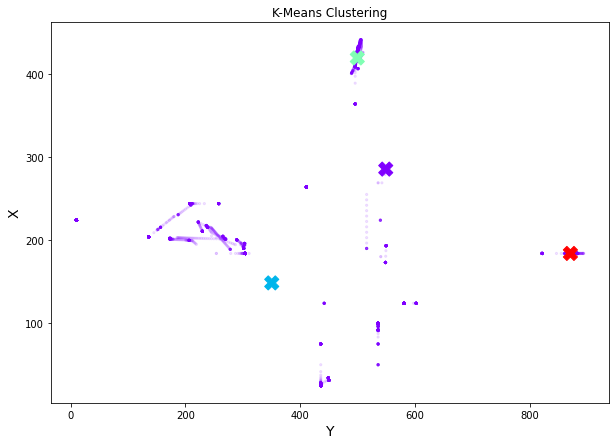

In [4]:
# SETTING THE VALUE OF K
k = 6

start_time = time.time() # getting the current time
dist, cent = KMeans(df, k)
# Printing the elapsed time of selection sort using arrays as arguments
print("Time taken for clustering is:\
      --- %s seconds ---" % (time.time() - start_time))
print("\n")

x, y = [cent[i][0] for i in cent], [cent[i][1] for i in cent]

df.plot(kind="scatter", x = "X", y = "Y", alpha = 0.1,
    s = 5, figsize = (10,7), colorbar = False,
    c = np.array(dist)[:,-1], cmap = plt.get_cmap("rainbow"),
    sharex=False)

plt.scatter(x, y, marker='X', alpha = 1.0, c = [u for u in cent], cmap = plt.get_cmap("rainbow"), s = 200)

#plt.imshow(cali, extent=[-124.55, -113.80, 32.45, 42.05], alpha = 0.3)
plt.ylabel("X", fontsize=14)
plt.xlabel("Y", fontsize=14)
plt.title('K-Means Clustering')

plt.show()


##cluster evaluation

In [5]:
EVENT_ACCIDENT = 1
EVENT_STOP = 2
CLUSTER_BOUNDARY = 100          # A cluster's radius = distance between centroid and farthest point + CUSTER_BOUNDARY
CLUSTER_COLOR = (50, 50, 200)   # Bluish
CLUSTER_COLOR_VAR = 50
CLUSTER_WIDTH = 2                       # Line thickness
CLUSTER_MOVING_AVERAGE_WEIGHT = 0.1
BATCH_FONT_SIZE = 30
BATCH_NAME_COLOR = (255, 255, 255) # white

##Define distance functions

In [64]:
def distance(x1, y1, time1, event1,\
                         x2, y2, time2, event2):
  
    return math.sqrt(distance_position(x1, y1, x2, y2)**2 +\
                            distance_time(time1, time2)**2 +\
                            distance_event(event1, event2)**2)

def distance_position(x1, y1, x2, y2):
    return math.sqrt((x1-x2)**2 + (y1-y2)**2)    

def distance_time(time1, time2):
    return math.sqrt((time1-time2)**2)

def distance_event(event1, event2):
    return math.sqrt((event1-event2)**2)

##Define a Report object


In [31]:
class Report():
    def __init__(self, reporter, x, y, event):
        self.reporter = reporter
        self.x = x
        self.y = y        
        self.time = int(time.time()) # current time in seconds        
        self.event = event  
        
        

##Define a Cluster object

In [65]:
class Cluster():
    def __init__(self, pygame, report):
        self.pygame = pygame
        self.x = report.x
        self.y = report.y
        self.time = report.time
        self.event = report.event
        self.reports = [report]
        self.radius = CLUSTER_BOUNDARY
        self.max_distance = 0
        self.color = report.reporter.color
        self.color = (CLUSTER_COLOR[0]+random.randrange(-CLUSTER_COLOR_VAR,CLUSTER_COLOR_VAR),
                      CLUSTER_COLOR[1]+random.randrange(-CLUSTER_COLOR_VAR,CLUSTER_COLOR_VAR),
                       CLUSTER_COLOR[2]+random.randrange(-CLUSTER_COLOR_VAR,CLUSTER_COLOR_VAR))
        
    def distance(self, report): 
        return distance(self.x, self.y, self.time, self.event,\
                         report.x, report.y,  report.time, report.event)

    def insert(self, report): # function to insert report to a cluster

        # Insert the new report into the report list
        self.reports.append(report)

        '''
        Method #1: Centroid is a weighted moving average of reports
                Compared to having a fixed centroid,
                            this way is better to differentiate accidents in one direction
                                                                                    vs. those that affect both directions
        '''
        '''
        # Update centroid as a weighted moving average of reports
        self.x = self.x * (1 - CLUSTER_MOVING_AVERAGE_WEIGHT)\
                         + report.x * CLUSTER_MOVING_AVERAGE_WEIGHT
        self.y = self.y * (1 - CLUSTER_MOVING_AVERAGE_WEIGHT)\
                         + report.y * CLUSTER_MOVING_AVERAGE_WEIGHT
        self.time = self.time * (1 - CLUSTER_MOVING_AVERAGE_WEIGHT)\
                         + report.time * CLUSTER_MOVING_AVERAGE_WEIGHT         
        self.event = self.event * (1 - CLUSTER_MOVING_AVERAGE_WEIGHT)\
                         + report.event * CLUSTER_MOVING_AVERAGE_WEIGHT

        # Update radius        
        max_distance = 0
        for r in self.reports:
            distance = self.distance(r)
            if max_distance < distance:
                max_distance = distance
        self.radius = max_distance + CLUSTER_BOUNDARY
        '''
        '''
        Method #2: X/Y of centroid remains at the position of the initial report
        '''
        '''
        # Update only the time of centroid
        self.time = report.time

        # Update radius
        distance = self.distance(report)
        if (distance  > self.max_distance):
            self.max_distance = distance
            self.radius = self.max_distance + CLUSTER_BOUNDARY
        '''
        
        '''
        Method #3: Centroid is updated upon every new report
        '''
        
        # Update centroid as the average of all reports in the cluster
        n = len(self.reports) - 1
        n_new = len(self.reports)
        self.x = (self.x * n + report.x) / n_new
        self.y = (self.y * n + report.y) / n_new
        self.time = (self.time * n + report.time) / n_new
        self.event = (self.event * n + report.event) / n_new

        # Update radius # boundary
        max_distance = 0
        for r in self.reports:
            distance = self.distance(r)
            if max_distance < distance:
                max_distance = distance
        self.radius = max_distance + CLUSTER_BOUNDARY
        
        
    def include_report(self, report):
        distance_to_report = self.distance(report)
        return (distance_to_report <= self.radius, distance_to_report)

    def include_cluster(self, cluster):
        distance_to_cluster = distance(self.x, self.y, self.time, self.event,\
                         cluster.x, cluster.y, cluster.time, cluster.event)
        return distance_to_cluster <= self.radius

    def combine_with(self, cluster):
        # Extend report list
        self.reports.extend(cluster.reports)

        # Update x, y, time, and event as the average of all reports
        self.x = 0
        self.y = 0
        self.time = 0
        self.event = 0
        for report in self.reports:
            self.x += report.x
            self.y += report.y
            self.time += report.time
            self.event += report.event
        self.x = self.x / len(self.reports)
        self.y = self.y / len(self.reports)
        self.time = self.time / len(self.reports)
        self.event = self.event / len(self.reports)        
        # Update radius
        max_distance = 0
        for report in self.reports:
            distance = self.distance(report)
            if max_distance < distance:
                max_distance = distance
        self.radius = max_distance + CLUSTER_BOUNDARY

        # Update color with the average color of two clusters
        self.color = (int((self.color[0]+cluster.color[0])/2), int((self.color[1]+cluster.color[1])/2), int((self.color[2]+cluster.color[2])/2))
        
    def paint_on(self, screen):
        if len(self.reports) <= 10: # Show only significant clusters and exclude those with temporary congestion
            return

        # Draw a circle that represents this cluster
        self.pygame.draw.circle(screen, self.color, [self.x,self.y], self.radius, CLUSTER_WIDTH)

        # Show the number of reports that belong to this cluster
        font_report_num = self.pygame.font.SysFont(None, min(len(self.reports)+20,100))        
        report_num = font_report_num.render(str(len(self.reports)), True, self.color)
        screen.blit(report_num, (self.x, self.y))  
        
    def report_list(self, report): # returns list of reports
       return(report.Report(x))


In [82]:
print(x)

[549.30994148772, 350.54394976182215, 499.72021408869, nan, 871.3098208136892, nan]


##Define a batch object

In [102]:
class Batch():
    def __init__(self, pygame, batch_num, time_batch):
        self.pygame = pygame
        self.report_queue = []
        self.cluster_list = []
        self.batch_num = batch_num
        self.font_batch_num = pygame.font.SysFont(None, BATCH_FONT_SIZE)        
        self.begin_time = pygame.time.get_ticks()    # get time in milliseconds since pygame.init() was called
        self.end_time = self.begin_time + time_batch
        self.time_batch = time_batch
        
    def paint_on(self, screen):
        remaining_time = int((self.end_time - self.pygame.time.get_ticks())/1000) + 1        
        batch_num_object = self.font_batch_num.render("batch #" + str(self.batch_num) + " (" + str(remaining_time) + "/" + str(int(self.time_batch/1000)) + " secs remain)", True, BATCH_NAME_COLOR)
        screen.blit(batch_num_object, (0,0))
        for cluster in self.cluster_list:
            cluster.paint_on(screen)

    def report(self, car, event):
        self.report_queue.append(Report(car, car.rect.centerx, car.rect.centery, car.lane, event))
        #return Report(car, car.rect.centerx, car.rect.centery, car.lane, event) # i added
    #def report_list(self, car, event):
        #return Report()
    def process_reports(self):    
        for report in self.report_queue:
            min_distance = math.inf
            nearest_cluster = None
            for cluster in self.cluster_list:
                include, distance = cluster.include_report(report)
                if include and (distance < min_distance):
                    nearest_cluster = cluster
                    min_distance = distance
                    
            if nearest_cluster != None:
                # If a nearest cluster exists, push the report into the cluster
                nearest_cluster.insert(report)
            else:
                # Otherwise, create a new cluster with the report
                self.cluster_list.append(Cluster(self.pygame, report))
                self.report_queue.clear('nan')
                self.combine_clusters()  
                # callingcombinecluster()


In [106]:
def combine_clusters(self):
 for cluster in self.cluster_list:
     cluster.combined = False      
 for i in range(0, len(self.cluster_list)-2):
     c1 = self.cluster_list[i]
     if c1.combined:
       continue            
     for j in range(i+1, len(self.cluster_list)-1):
       c2 = self.cluster_list[j]
       if c2.combined:
         continue                
       if c1.include_cluster(c2) or c2.include_cluster(c1):
         c1.combine_with(c2)
         c2.combined = True
         print("two clusters combined")
                    
     new_cluster_list = []
     for cluster in self.cluster_list:
        if not cluster.combined:
          new_cluster_list.append(cluster)
     self.cluster_list = new_cluster_list
 

##NEW self clusters 

In [46]:
from sklearn.decomposition import PCA
from IPython import display
import matplotlib.cm as cm
from matplotlib.pyplot import savefig
#%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from itertools import cycle, islice
from pandas.plotting import parallel_coordinates

In [47]:
data = pd.read_csv('/content/new_cluster_report.csv')

In [48]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6239 entries, 0 to 6238
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       6239 non-null   float64
 1   Y       6239 non-null   float64
 2   TIME    6239 non-null   int64  
 3   EVENT   6239 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 195.1 KB
None


In [49]:
features = ['X','Y','TIME']
select_df = data[features]
print(select_df.columns)

Index(['X', 'Y', 'TIME'], dtype='object')


In [50]:
X = StandardScaler().fit_transform(select_df)

K-Mean


In [86]:
def KMeans(X, K, maxIters=10):
 
    centroids = X[np.random.choice(np.arange(len(X)), K), :]
    for i in range(maxIters):
        # Cluster Assignment step
        C = np.array([np.argmin([np.dot(x_i - y_k, x_i - y_k)
                                 for y_k in centroids]) for x_i in X])
        # Move centroids step
        centroids = [X[C == k].mean(axis=0) for k in range(K)]
    return np.array(centroids), C

# test KMeans algorithm

centroids, C = KMeans(X, 3, 100)

pca = PCA(2)
X_pca = pca.fit_transform(X)
X_pca.shape

(6239, 2)

In [87]:
start_time = time.time()

K_Means = KMeans(X, 3, 100)


print("Time taken for clustering using online k-means is:\
      --- %s seconds ---" % (time.time() - start_time))
print("\n")

Time taken for clustering using online k-means is:      --- 9.509020328521729 seconds ---




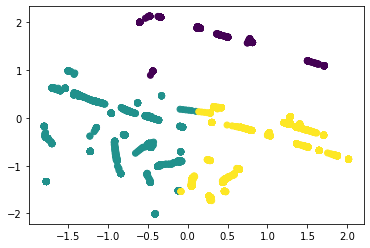

In [88]:
plt.scatter(X_pca[:,0], X_pca[:, 1], c=C)

SELF_K_MEAN

Time taken for clustering using online k-means is:      --- 53.080726861953735 seconds ---




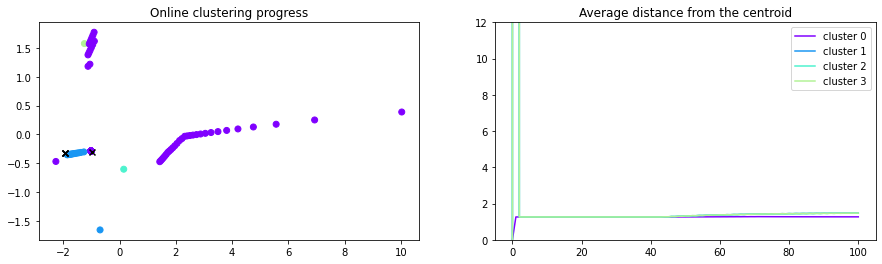

In [73]:
class OnlineKMeans:

    def __init__(self, X, K=6, window_size=np.inf, plot_progress=False, add_remove=False,
                 threshold_create=np.inf, threshold_remove=np.inf, cold_start=False):
        self.X = X
        self.K = K
        self.window_size = window_size
        self.plot_progress = plot_progress
        self._nsamples = X.shape[0]
        self._dim = X.shape[1]
        self._eps = 1e-3
        self.threshold_create = threshold_create
        self.threshold_remove = threshold_remove
        self.add_remove = add_remove
        self.cold_start = cold_start
        plt.figure(figsize=(15, 4))

        if self._nsamples < K:
            print("Error")

    def _plot_progress(self, c, centroids):
        pca = PCA(2)
        pca.fit(self._X_norm)
        X_pca = pca.transform(self._X_norm)

        centroids_ = [centroids[i]
                      for i in range(len(centroids)) if i not in self._infidx]
        centroids_pca = pca.transform(centroids_)

        plt.clf()

        plt.subplot(121)
        plt.title('Online clustering progress')

        colors = cm.rainbow([0.2 * i for i in range(self.K)]).tolist()
        map_colors = [colors[k] for k in c]
        plt.scatter(X_pca[:, 0], X_pca[:, 1], c=map_colors)
        plt.scatter(centroids_pca[:, 0],
                    centroids_pca[:, 1], color='black', marker='x')

        plt.subplot(122)
        plt.title('Average distance from the centroid')
        plt.ylim(ymax=12)

        max_dim = np.max([len(self._mean_dist[i])
                          for i in range(len(self._mean_dist))])

        for i in range(len(self._mean_dist)):
            self._mean_dist[i].extend(
                [0] * (max_dim - len(self._mean_dist[i])))

        for k in range(self.K):
            plt.plot(np.array(self._mean_dist)[
                     :, k], color=colors[k], label='cluster ' + str(k))

        plt.legend()

        display.display(plt.gcf())
        display.clear_output(wait=True)
        plt.savefig('imagen.pdf')

    def data_stream(self):
        """
        Simulate data streaming
        """
        yield from self.X

    def distance(self, x, y, method='euclidean'):
        if method is 'euclidean':
            return np.sqrt(np.dot(x - y, x - y))
        else:
            print('%s distance unknown' % method)

    def update_centroids(self, gamma, data_point, centroid):
        return (centroid + gamma * (data_point - centroid))

    def add_cluster(self):
        self.K += 1

    def run(self, max_iter=100):
        
        stream = self.data_stream()
        C = list(range(self.K))
        
        if self.cold_start:
            centroids = np.random.multivariate_normal(np.zeros(self._dim), np.eye(self._dim), self.K)            
            init = 0
            
        else:
            centroids = np.array([next(stream) for _ in range(self.K)])
            init = self.K
        
        
        # To normalize data on the fly
        mean = np.mean(centroids, axis=0)
        sigma = np.std(centroids, axis=0)
        centroids = (centroids - mean) / (sigma + self._eps)

        # auxiliary vectors only for plotting purposes
        self._X_norm = list(centroids)
        self._mean_dist = [[0] * self.K]
        self._infidx = []

        for t in range(init, min(self._nsamples, max_iter)):
            p = next(stream)

            mean_new = (t * mean + p) / (t + 1)
            sigma_new = np.sqrt(
                (sigma**2 * t + (p - mean) * (p - mean_new)) / (t + 1))

            normalized_p = (p - mean_new) / (sigma_new + self._eps)
            centroids = (centroids * sigma + mean - mean_new) / (sigma_new + self._eps)

            if self.add_remove:
                idx = np.argmin([self.distance(normalized_p, c)
                                 for c in centroids])

                # Condition to add a new cluster
                if self.distance(normalized_p, centroids[idx]) > self.threshold_create:
                    C.append(self.K)
                    self.add_cluster()
                    centroids = np.append(centroids, [normalized_p], axis=0)

                # Condition to remove cluster
                else:
                    while t - np.max(np.where(C == idx)) > self.threshold_remove:
                        centroids[idx] = np.inf * np.ones(self._dim)
                        self._infidx.append(idx)
                        idx = np.argmin([self.distance(normalized_p, c)
                                         for c in centroids])

                    C.append(
                        np.argmin([self.distance(normalized_p, c) for c in centroids]))

                    if self.window_size < t:
                        centroids[C[-1]] = self.update_centroids(1 / self.window_size,
                                                                 normalized_p, centroids[C[-1]])

                    else:
                        centroids[C[-1]] = self.update_centroids(1 / (t+1),
                                                                 normalized_p, centroids[C[-1]])

            else:
                C.append(
                    np.argmin([self.distance(normalized_p, c) for c in centroids]))

                if self.window_size < t:
                    centroids[C[-1]] = self.update_centroids(1 / self.window_size,
                                                             normalized_p, centroids[C[-1]])
                else:
                    centroids[C[-1]] = self.update_centroids(1 / (t+1),
                                                             normalized_p, centroids[C[-1]])

            # Update mean and sigma
            mean = mean_new
            sigma = sigma_new
                    
            # We save the normalized points and mean distance only for plotting purposes
            self._X_norm.append(normalized_p)
            self._mean_dist.append([np.mean([self.distance(
                p, centroids[k]) for p in self._X_norm[C == k]], axis=0) for k in range(self.K)])

            if self.plot_progress:
                self._plot_progress(C, centroids)

        return np.array(centroids), C

#getting current time
start_time = time.time()

online_kmeans = OnlineKMeans(X, 4, plot_progress=True,
                            add_remove=True, cold_start=True)

centroids, c = online_kmeans.run(max_iter=100)
print("Time taken for clustering using online k-means is:\
      --- %s seconds ---" % (time.time() - start_time))
print("\n")

In [90]:
def k_means(data, k, threshhold=200):
    n = np.size(data, 0)
    # random initial assignment of clusters
    cluster_centers = np.random.choice(range(0, n), k)
    clustering = np.random.randint(0, k, n)
    cluster_means = data[cluster_centers]
    old_clustering = np.zeros(n)
    # while the clustering has not converged ... 
    while np.sum(clustering != old_clustering) > threshhold:
        # print np.sum(clustering != old_clustering)
        old_clustering = clustering

        # step 1: Assign points to clusters
        cluster_distances = np.zeros((n, k))
        for cluster in range(k):
            cluster_distances[:, cluster] = np.sum(np.sqrt((data - cluster_means[cluster])**2), 1)
        clustering = np.argmin(cluster_distances, 1)

        # step 2: re-calculating means
        # cluster_means should be a k x d array
        cluster_means = np.array([np.mean(data[clustering==c],0) for c in range(k)])
    return clustering

def k_means_update(point, k, cluster_means, cluster_counts):
  
    cluster_distances = np.zeros(k)
    for cluster in range(k):
        cluster_distances[cluster] = sum(np.sqrt((point - cluster_means[cluster])**2))
    c = np.argmin(cluster_distances)
    cluster_counts[c] += 1
    cluster_means[c] += 1.0/cluster_counts[c]*(point - cluster_means[c])
    return c

In [91]:
print(c)

[0, 1, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
